<a href="https://colab.research.google.com/github/gmauricio-toledo/numerical-methods/blob/master/EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!git init
!git pull https://github.com/gmauricio-toledo/numerical-methods.git 

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 131 (delta 60), reused 57 (delta 17), pack-reused 0
Receiving objects: 100% (131/131), 1.35 MiB | 7.07 MiB/s, done.
Resolving deltas: 100% (60/60), done.
From https://github.com/gmauricio-toledo/numerical-methods
 * branch            HEAD       -> FETCH_HEAD


In [23]:
f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5

sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

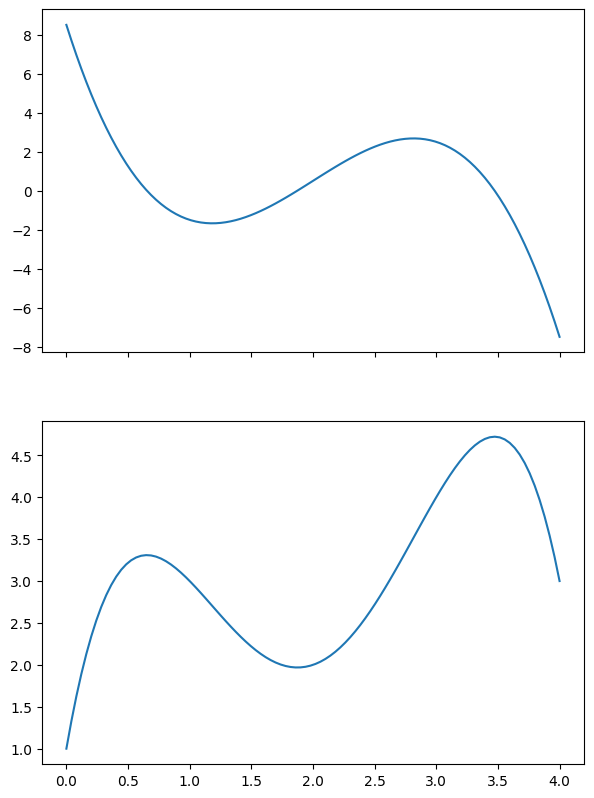

In [31]:
import matplotlib.pyplot as plt

xs = np.linspace(0,4,100)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(7,10),dpi=100)
ax1.plot(xs,[f(x) for x in xs])
ax2.plot(xs,[sol(x) for x in xs])
fig.show()

Implementación *stand-alone*

In [ ]:
import numpy as np

a = 0
b = 4

h = 0.5

x0 = 0
y0 = 1

n = int((b-a)/h)

xs = np.linspace(a,b,n+1)
ys = np.zeros_like(xs)

ys[0] = y0
for j in range(1,n+1):
    ys[j] = ys[j-1] + f(xs[j-1])*h

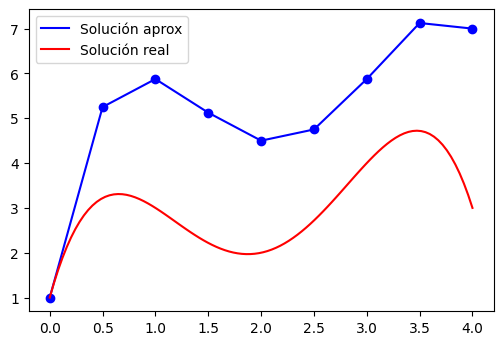

In [ ]:
import matplotlib.pyplot as plt

xaxis = np.linspace(a,b,100)

plt.figure(dpi=100)
plt.plot(xs,ys,color='blue',label='Solución aprox')
plt.scatter(xs,ys,color='blue')
plt.plot(xaxis,[sol(x) for x in xaxis],color='red',label='Solución real')
plt.legend(loc='best')
plt.show()

Como clase

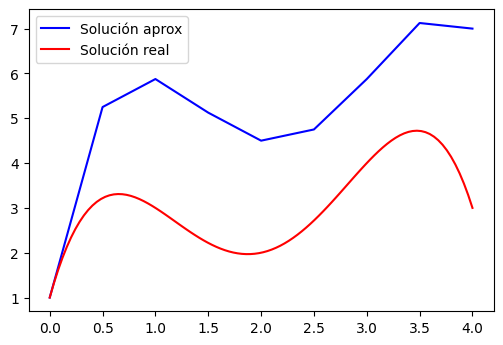

In [35]:
from edo import EulerEDO

f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5
sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

a = 0
b = 4
h = 0.5
x0 = 0
y0 = 1

solver = EulerEDO(f,sol)
solver.fit(a,b,h,x0,y0)

solver.plot(plot_nodes=False)